In [2]:
import warnings

from imblearn.over_sampling import RandomOverSampler
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [3]:
# Silence warnings
warnings.filterwarnings('ignore')

In [4]:
# Create a dataframe from our dataset and remove duplicates
df = pd.read_csv("data/cancer/lung_cancer_survey.csv")
df.drop_duplicates(inplace=True)

In [5]:
# Encode the Lung Cancer and Gender columns to binary values
# M->1 F->0
# YES->1 NO->0
encoder = LabelEncoder()
df['LUNG_CANCER']=encoder.fit_transform(df['LUNG_CANCER'])
df['GENDER']=encoder.fit_transform(df['GENDER'])

# Age the only column with continuous values, so separate it from the others
con_col = ['AGE']
cat_col=[i for i in df.columns if i != "AGE"]

# Separate independent and dependent features
x=df.drop(['LUNG_CANCER'],axis=1)
y=df['LUNG_CANCER']

# Normalize 1's and 2's as 0's and 1's
for i in x.columns[2:]:
    temp=[]
    for j in x[i]:
        temp.append(j-1)
    x[i]=temp

# Oversample minority classes
x_over, y_over = RandomOverSampler().fit_resample(x,y)

# Split data into training and test datasets
x_train, x_test, y_train, y_test = train_test_split(
    x_over, y_over, random_state=42 ,stratify=y_over
)

# Standardize Age data in both the training and test datasets
scaler = StandardScaler()
x_train['AGE'] = scaler.fit_transform(x_train[['AGE']])
x_test['AGE'] = scaler.transform(x_test[['AGE']])

[0 0 1 1 0 1 1 1 1 1 1 0 0 1 1 0 1 0 0 1 0 1 0 1 0 0 0 0 0 0 1 0 1 1 0 0 1
 0 0 1 0 0 1 0 0 1 0 1 1 1 1 0 1 1 1 1 0 1 0 0 1 0 0 1 0 0 0 0 1 1 1 0 0 0
 0 0 0 0 0 1 1 0 1 0 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 1 0 0 0 0 0 0 1 0 0 0
 1 0 1 1 0 1 0 0]
     GENDER       AGE  SMOKING  YELLOW_FINGERS  ANXIETY  PEER_PRESSURE  \
129       0 -0.124698        1               0        0              0   
227       0 -1.497979        0               1        1              0   
133       0 -0.696898        1               1        1              0   
100       1  0.218622        1               0        0              0   
184       1 -0.811338        1               0        0              0   
..      ...       ...      ...             ...      ...            ...   
442       1  0.104182        1               1        1              0   
327       0  2.850744        0               0        0              0   
257       1  0.905263        1               0        0              0   
427       0 -0.01

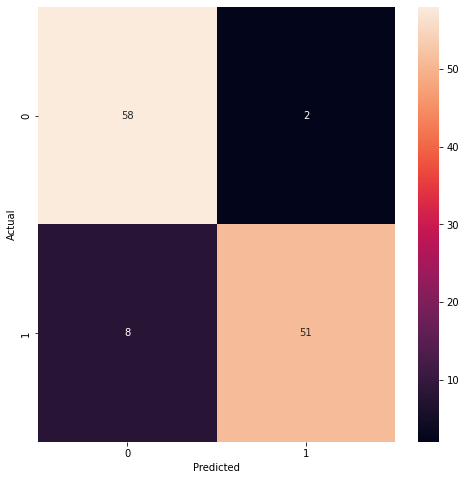

In [9]:
param_grid = {
    'C':[0.001,0.01,0.1,1,10,100], 
    'max_iter':[50,75,100,200,300,400,500,700]
}

# Train model on training data
log = RandomizedSearchCV(LogisticRegression(solver='lbfgs'), param_grid, cv=5)
log.fit(x_train,y_train)

y_pred_log = log.predict(x_test)
confusion_log = confusion_matrix(y_test,log.predict(x_test))

plt.figure(figsize=(8,8))
sns.heatmap(confusion_log,annot=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")

print(f"Pred log: {y_pred_log}")
print(f"X Test: {x_test}")